# KNN

* Gözlemlerin birbirlerine olan benzerlikleri üzerinden tahmin yapılır. 
* Regresyon ve Classification problemleri için kullanılabilir.

>>>> 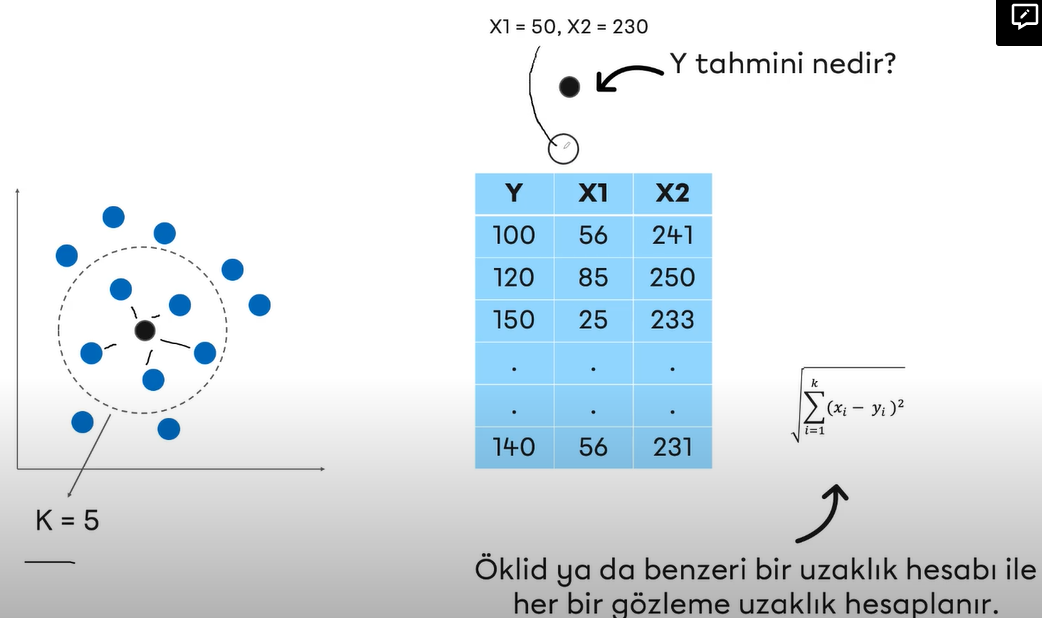

## Keşifci Veri Analizi

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Data Preprocessing & Feature Engineering

In [10]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)


X_scaled = StandardScaler().fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Modelleme & Prediction

In [11]:
# modeli kurduk.
knn_model = KNeighborsClassifier().fit(X, y)

# 1 Tane rastgele değişken seçiyoruz.
random_user = X.sample(1, random_state=45)
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,0.342981,1.161295,0.770014,1.283638,1.130518,0.940144,-0.232176,-0.360847


In [12]:
# Seçtiğimiz random değişken üzerinden tahminleme yapıyoruz.
knn_model.predict(random_user)

array([1], dtype=int64)

## Model Başarısını Değerlendirme

In [14]:
# Tahmin edilen değerleri tutuyoruz.
y_pred = knn_model.predict(X)

# AUC için y_prob:
y_prob = knn_model.predict_proba(X)[:, 1] # 1 sınıfına ait olma olasılıkları

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.79      0.70      0.74       268

    accuracy                           0.83       768
   macro avg       0.82      0.80      0.81       768
weighted avg       0.83      0.83      0.83       768



In [15]:
# AUC skoru

roc_auc_score(y, y_prob)

0.9017686567164179

* Yapılması mantıklı olan işlem modelin görmediği veri üzerinde test edilmesidir.

In [16]:
# CrossValidation

cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results

{'fit_time': array([0.00649285, 0.00398922, 0.00398922, 0.00398779, 0.00598502]),
 'score_time': array([0.02094364, 0.02592993, 0.02879548, 0.02194142, 0.02094316]),
 'test_accuracy': array([0.72077922, 0.73376623, 0.71428571, 0.77124183, 0.7254902 ]),
 'test_f1': array([0.58252427, 0.60952381, 0.54166667, 0.63917526, 0.58      ]),
 'test_roc_auc': array([0.77555556, 0.78759259, 0.73194444, 0.83226415, 0.77528302])}

In [17]:
cv_results["test_accuracy"].mean()

0.733112638994992

In [18]:
cv_results["test_f1"].mean()

0.5905780011534191

In [19]:
cv_results["test_roc_auc"].mean()

0.7805279524807827

> **Model başarısını nasıl artırabiliriz?** 
>> * Veri sayısını artırarak. 
>> * Veri ön işleme adımına önem vererek. 
>> * Özellik Mühendisliği ile yeni değişkenler türeterek. 
>> * İlgili algoritma için optimizasyonlar yapılabilir.

In [20]:
## KNeighbors modelinin sahip olduğu default parametreler
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Hiperparametre Optimizasyonu

In [22]:
knn_model = KNeighborsClassifier()

# Hyperparameters 
knn_params = {"n_neighbors": range(2, 50)}
knn_gs_best = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, verbose=1).fit(X, y)

# Bulduğumuz parametreler
knn_gs_best.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'n_neighbors': 17}

## Final Model

In [23]:
# Elde ettiğimiz parametreler ile final modelinin kurulması

knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y) # dictler için ** kullanıyoruz.


cv_results = cross_validate(knn_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])


In [24]:
cv_results["test_accuracy"].mean()

0.7669892199303965

In [25]:
cv_results["test_f1"].mean()

0.6170909049720137

In [26]:
cv_results["test_roc_auc"].mean()

0.8127938504542278

# CART (Classification & Regression Tree)

* Random Forest'ın temelini oluşturur. 
* Amaç veri seti içerisindei karmaşık yapıları basit karar yapılarına dönüştürmektir. 
* Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır. 
>>> 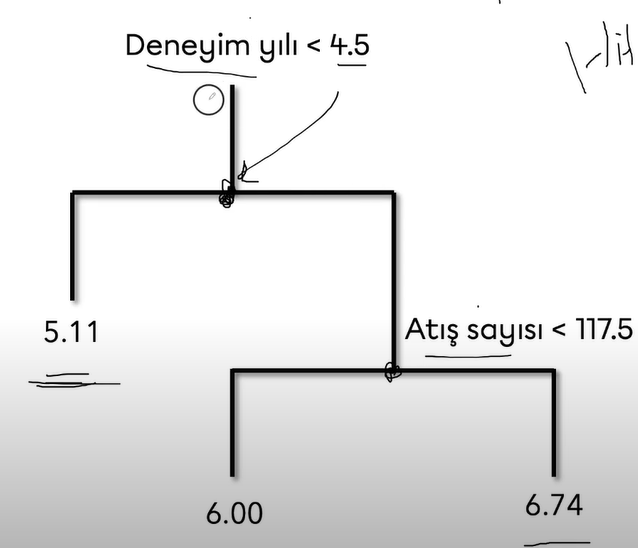

* En üstteki bağımsız değişken en önemli değişkendir diyebiliriz. Dallara indikçe önem düzeyi azalır.

## Regresyon Problemleri için Cost/Loss/Objective Fonksiyonu

>>>> 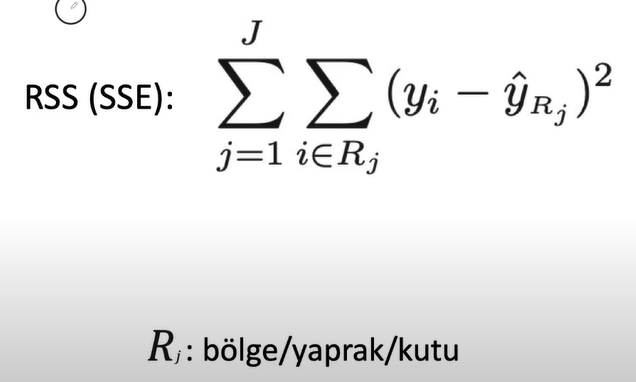

* Ağaç dallanmalarını hangi değerlere göre yapacağımızı belirlemek en önemli noktadır. 
* Machine Learning modelleri bunu gerçekleştiriyor.

## Sınıflandırma Problemleri için Cost/Loss/Objective Fonksiyonu

>>>> 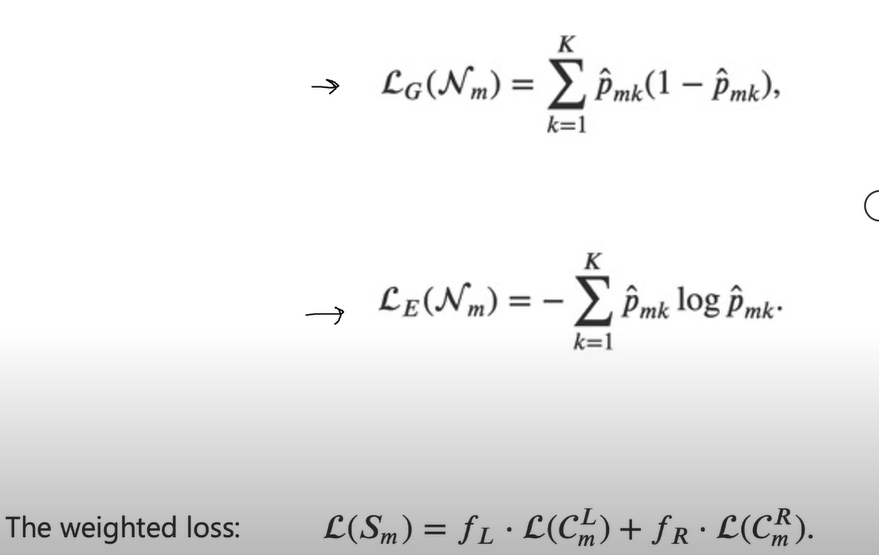

* Çalışma mantığını anlamak için bir uygulama üzerinde görelim.

>> 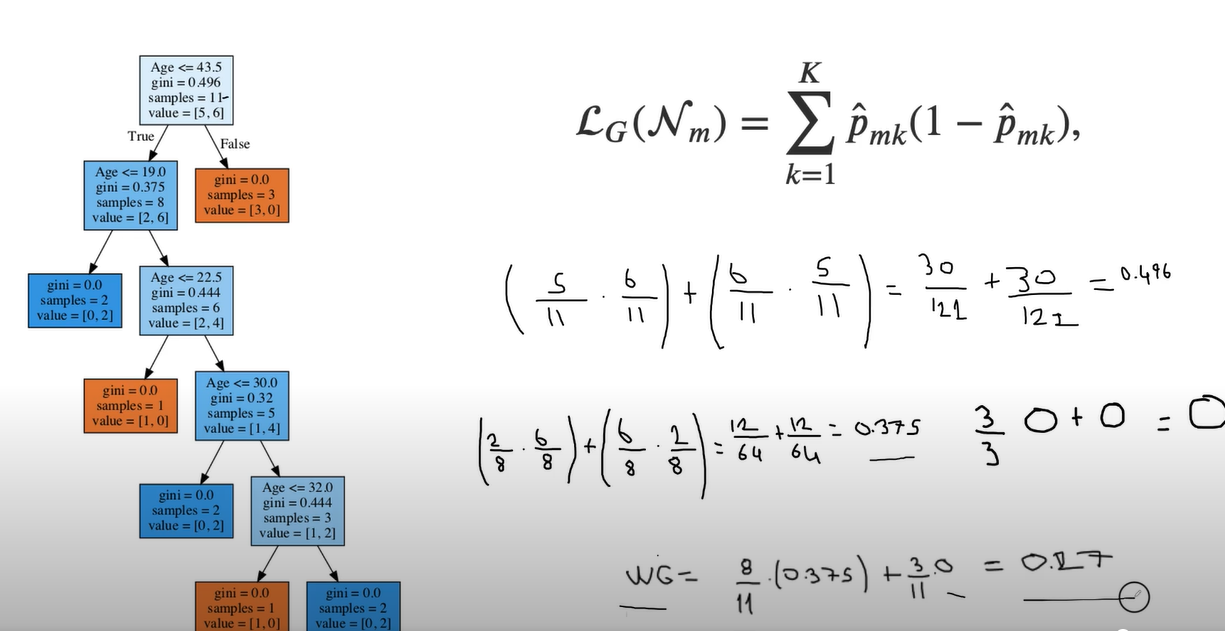

* Her kutucuk için değerleri hesaplıyoruz.

## CART UYGULAMA

In [27]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=5f0f081f801a1b2a0798c842f269362196be23712b0d1761c0c27a8a8738ab63
  Stored in directory: c:\users\ahmet\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [28]:
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54287 sha256=6abee486a025ec2e0c9e99ca1f755b956dd6dda5f1cf64fd2326785d03119a04
  Stored in directory: c:\users\ahmet\appdata\local\pip\cache\wheels\fd\94\33\2a75ac13109534426a0ace0cde02f41aef30a846f1facd4110
Successfully built skompiler


In [30]:
!pip install astor

In [31]:
!pip install joblib

In [34]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile # excel, python, sql gibi farklı çıktılar

In [35]:
pd.set_option("display.max_columns", None)
warnings.simplefilter(action="ignore", category=Warning)

### Exploratory Data Analysis

In [36]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Preprocessing & Feature Engineering

In [37]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

### Modeling

In [40]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

y_pred = cart_model.predict(X)

# AUC için y_prob:
y_prob = cart_model.predict_proba(X)[:, 1]

# Confusion matrix
print(classification_report(y, y_pred)) # OverFitting

# AUC
roc_auc_score(y, y_prob) # Nasıl 1.0 çıkıyor? Bunu düşünmeliyiz.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



1.0

In [43]:
# Başarımı nasıl daha iyi değerlendirebilirim?

# Holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

# Train Hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))
print("Train roc_auc_score:", roc_auc_score(y_train, y_prob))
# Yine 1.0 alıyoruz...
print("#"*22)
# Test Hatası
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("Test roc_auc_score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

Train roc_auc_score: 1.0
######################
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231

Test roc_auc_score: 0.6739506172839506


In [45]:
# Modelin daha iyi genelleme yapabilmesini sağlamak için CrossValidation yapmalıyız.

# CV
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y) # Burada fit etmemize gerek yok aslında.

# cross_validate sırasında zaten model fit ediliyor
cv_results = cross_validate(cart_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [46]:
cv_results["test_accuracy"].mean()

0.7148496240601504

In [48]:
cv_results["test_f1"].mean()

0.5780669232692448

In [49]:
cv_results["test_roc_auc"].mean()

0.6796239316239316

### Hiperparametre Optimizasyonu

In [50]:
cart_model.get_params() # default parametreler

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [52]:
# GridSearchCV

# Bu değişkenler için aralıkları nasıl belirleyeceğiz?
cart_params = {"max_depth": range(1, 11),
              "min_samples_split": range(2, 20)}
# Bu aralıkları default değerlerini kapsayacak şekilde belirliyoruz.


cart_best_grid = GridSearchCV(cart_model, cart_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
cart_best_grid.best_params_ # Elde edilen optimum parametreler

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'max_depth': 5, 'min_samples_split': 4}

In [53]:
# Elde edilen en iyi değerlere karşılık gelen score

cart_best_grid.best_score_ # default olarak accuracy

0.7500806383159324

> **NOT** 
>> * Ağaç modelleri için Standardizasyon işlemine gerek yoktur. 
>> * GridSearchCV nesnesi içerisinde en iyi modeli saklar. 
>> * Ama genel olarak final model kurmak daha sağlıklı olacaktır.

In [54]:
# GridSearchCV nesnesi üzerinden predict yapıyoruz.

random = X.sample(1, random_state=45)


cart_best_grid.predict(random)

array([1], dtype=int64)

### Final Model

In [59]:
# Elde ettiğimiz Optimum parametreler ile final modelini kuruyoruz.

cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)

# cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y) --> Alternatif

cv_results = cross_validate(cart_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [60]:
cv_results["test_accuracy"].mean()

0.7344326725905673

In [61]:
cv_results["test_f1"].mean()

0.5701221536747852

In [62]:
cv_results["test_roc_auc"].mean()

0.7710925925925926

### Feature İmportance

In [63]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

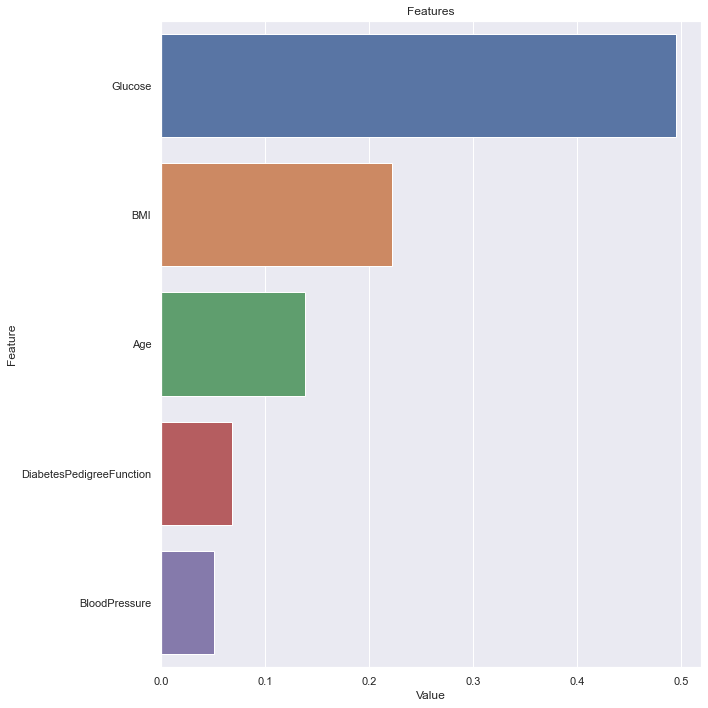

In [64]:
plot_importance(cart_final, X, num=5) # Modelimizi en çok etkileyen değişken "Glucose"

# Feature engineering kısmında "Glucose" üzerine yoğunlaşmak mantıklı olabilir.

### Analyzing Model Complexity with Learning Curves

In [65]:
train_score, test_score = validation_curve(cart_final, X, y, 
                                           param_name= "max_depth", 
                                           param_range= range(1,11),
                                          scoring="roc_auc",
                                          cv=10)

# Her "max_depth" değeri için 10 CV yapılıyor ve belirlediğimiz "roc_auc" skoru tutuluyor.

In [66]:
train_score

array([[0.72320885, 0.72306132, 0.68555095, 0.72350392, 0.71698479,
        0.7011941 , 0.66131397, 0.71142923, 0.71549128, 0.71120294],
       [0.7987598 , 0.79874136, 0.76659751, 0.8000461 , 0.80217151,
        0.77901798, 0.76472568, 0.79175657, 0.80145087, 0.79440771],
       [0.84255417, 0.84810512, 0.82195943, 0.84559705, 0.8434532 ,
        0.81859843, 0.82218534, 0.83455048, 0.8413315 , 0.84593664],
       [0.8834947 , 0.88264638, 0.86355002, 0.88926233, 0.88226372,
        0.87104195, 0.86404334, 0.87285846, 0.87436639, 0.87684114],
       [0.91531581, 0.9138497 , 0.89976487, 0.92513601, 0.91451821,
        0.90380821, 0.88505302, 0.90792531, 0.91068411, 0.90586318],
       [0.94068234, 0.94559244, 0.92840479, 0.94609959, 0.94535731,
        0.9309728 , 0.91167819, 0.93286307, 0.94030303, 0.93088154],
       [0.96760258, 0.96744583, 0.95147533, 0.96842785, 0.96832181,
        0.95850161, 0.93983864, 0.96071   , 0.96145546, 0.95757576],
       [0.97867681, 0.98590595, 0.9736606

In [67]:
test_score

array([[0.64777778, 0.64925926, 0.68074074, 0.64481481, 0.64222222,
        0.68481481, 0.63666667, 0.75333333, 0.71692308, 0.75615385],
       [0.73407407, 0.74888889, 0.73555556, 0.71592593, 0.61703704,
        0.77777778, 0.70481481, 0.82555556, 0.74615385, 0.80038462],
       [0.78407407, 0.81333333, 0.77222222, 0.68296296, 0.69296296,
        0.82925926, 0.79259259, 0.85814815, 0.72615385, 0.80807692],
       [0.76481481, 0.81148148, 0.74962963, 0.60740741, 0.70888889,
        0.82111111, 0.83851852, 0.87333333, 0.77038462, 0.81961538],
       [0.73444444, 0.78666667, 0.76333333, 0.60037037, 0.71925926,
        0.84814815, 0.80074074, 0.88296296, 0.75730769, 0.81769231],
       [0.72814815, 0.77962963, 0.7462963 , 0.59481481, 0.76259259,
        0.82740741, 0.81592593, 0.83185185, 0.76038462, 0.77692308],
       [0.74222222, 0.77888889, 0.75222222, 0.54296296, 0.71851852,
        0.75444444, 0.82481481, 0.8462963 , 0.67346154, 0.76961538],
       [0.71481481, 0.7137037 , 0.7522222

In [68]:
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

print("Train mean:", mean_train_score) # 10'ar tane değer elde ettik çünkü max_depth için 10 ihtimal verdik.
print("Test mean:", mean_test_score)

Train mean: [0.70729413 0.78976751 0.83642714 0.87603684 0.90819184 0.93528351
 0.96013549 0.97716774 0.98781586 0.99359846]
Test mean: [0.68127066 0.74061681 0.77597863 0.77651852 0.77109259 0.76239744
 0.74034473 0.7137265  0.69966524 0.69232051]


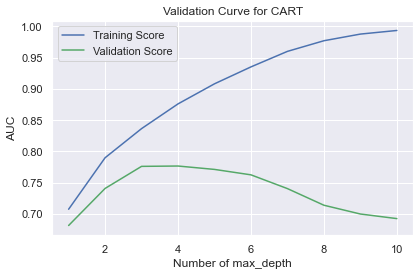

In [70]:
# Elde ettiğimiz train ve test skorlarınının görselleştirilmesi

plt.plot(range(1, 11), mean_train_score, label="Training Score", color="b")
plt.plot(range(1, 11), mean_test_score, label="Validation Score", color="g")
plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Grafiği incelediğimizde max_depth değeri 3'den sonra genellenebilirlik azalıyor.

> **NOT**
>> * Biz normalda GridSearchCV ile max_depth değerini 5 elde etmiştik. 
>> * Burada sadece fikir vermesi açısından inceliyoruz. 
>> * Tek başına buna bakarak bir karar veremeyiz. 

#### Fonksiyonlaştırma

In [73]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(model, X=X, y=y, 
                                               param_name = param_name, param_range=param_range,
                                              scoring=scoring, cv=cv)
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)
    
    plt.plot(param_range, mean_train_score, label="Training Score", color="b")
    plt.plot(param_range, mean_test_score, label="Test Score", color="g")
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

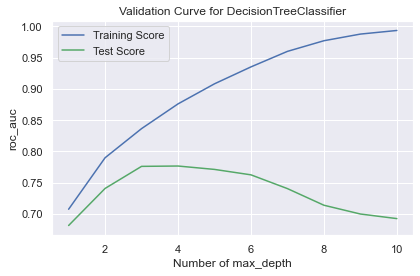

In [74]:
val_curve_params(cart_model, X, y, "max_depth", range(1,11))

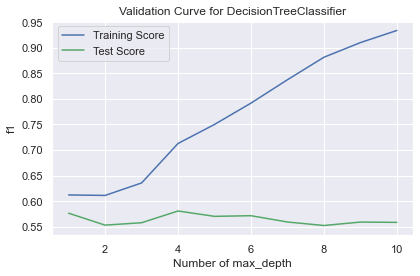

In [75]:
val_curve_params(cart_model, X, y, "max_depth", range(1,11), scoring="f1")

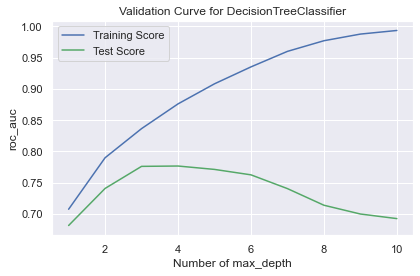

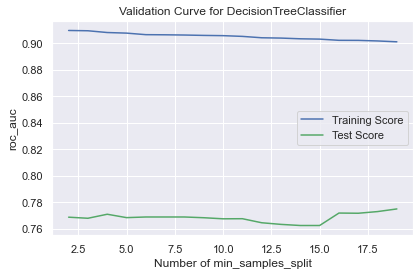

In [77]:
# Çoklu parametre için ne yapmalıyız?

cart_val_params = [["max_depth", range(1,11)], ["min_samples_split", range(2,20)]]
for i in range(len(cart_val_params)):
    val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])

### Görselleştirme

In [78]:
!pip install graphviz

In [82]:
import graphviz
import pydotplus

In [83]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [ ]:
tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

### Karar Kuralları

In [86]:
tree_rules = export_text(cart_model, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

#### Karar Kurallarının Python Kodlarını Çıkartma

In [88]:
print(skompile(cart_final.predict).to("python/code")) # Karar ağacımızın python kodları ile ifade edilişi

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )



In [89]:
print(skompile(cart_final.predict).to("sqlalchemy/sqlite")) # Karar ağacımızın sql kodları ile ifade edilişi

SELECT CASE WHEN (x2 <= 127.5) THEN CASE WHEN (x8 <= 28.5) THEN CASE WHEN (x6 <= 45.39999961853027) THEN CASE WHEN (x6 <= 30.949999809265137) THEN CASE WHEN (x1 <= 7.5) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x3 <= 99.0) THEN 1 ELSE 0 END END ELSE CASE WHEN (x6 <= 26.350000381469727) THEN CASE WHEN (x6 <= 9.649999618530273) THEN 1 ELSE 0 END ELSE CASE WHEN (x2 <= 99.5) THEN CASE WHEN (x2 <= 28.5) THEN 1 ELSE 0 END ELSE CASE WHEN (x7 <= 0.5609999895095825) THEN 0 ELSE 1 END END END END ELSE CASE WHEN (x6 <= 29.949999809265137) THEN CASE WHEN (x2 <= 145.5) THEN CASE WHEN (x5 <= 132.5) THEN CASE WHEN (x6 <= 28.149999618530273) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x8 <= 25.5) THEN 0 ELSE CASE WHEN (x8 <= 61.0) THEN 1 ELSE 0 END END END ELSE CASE WHEN (x2 <= 157.5) THEN CASE WHEN (x8 <= 30.5) THEN CASE WHEN (x3 <= 61.0) THEN 1 ELSE 0 END ELSE 1 END ELSE CASE WHEN (x5 <= 629.5) THEN 1 ELSE 0 END END END END AS y 
FROM data


In [90]:
print(skompile(cart_final.predict).to("excel")) # Karar ağacımızın excel kodları ile ifade edilişi

A1=IF((x2<=127.5),IF((x ...418 chars skipped... ((x5<=629.5),1,0))))


### Python Kodları ile Tahmin Yapma

In [91]:
def predict_with_rules(x):
    return (((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )

x = [12, 13, 20, 23, 4, 55, 12, 7] # Yeni gelen hasta bilgileri bunlar olsun.
predict_with_rules(x) # Yeni gelen hastayı "1" olarak tahminledi

1

## Model Kaydetme ve Çağırma

In [92]:
# model kaydetme
joblib.dump(cart_final, "cart_final.pkl")

['cart_final.pkl']

In [93]:
# Model çağırma
cart_model_from_disc = joblib.load("cart_final.pkl")

In [94]:
# Modeli kullanma

x = [12, 13, 20, 23, 4, 55, 12, 7]
cart_model_from_disc.predict(pd.DataFrame(x).T)

array([1], dtype=int64)

# Gelişmiş Ağaç Yöntemleri

## Random Forests

* Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır. 
* Bagging ile Random Subspace yöntemlerinin birleşimi ile oluşmuştur. 
* Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir. 
* Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir. 
* Ağaçları oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır. 
* Her düğüm noktasında rastgele değişken seçimi yapılır. (Regresyonda p/3, sınıflandırmada karekök p)

In [96]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option("display.max_columns", None)
warnings.simplefilter(action="ignore", category=Warning)

In [97]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
rf_model = RandomForestClassifier(random_state=17)
rf_model.get_params() # Modelimizin default parametreleri

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [100]:
# Base modelimizin sonuçlarına bakalım.
cv_results = cross_validate(rf_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

test accuracy: 0.753896103896104
test f1: 0.6190701534636385
test roc_auc: 0.8233960113960114


In [101]:
# Hyperparameters Optimization

rf_params = {"max_depth": [5, 8, None],
            "max_features": [3, 5, 7, "auto"],
            "min_samples_split": [2, 5, 8, 15, 20],
            "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [102]:
# Elde ettiğimiz optimum parametreler
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 8,
 'n_estimators': 500}

In [103]:
# Yeni parametreler ile model kuruyoruz.

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())
# Modelimizin biraz daha gelişim gösterdiği görülüyor.

test accuracy: 0.766848940533151
test f1: 0.6447777811143756
test roc_auc: 0.8271054131054132


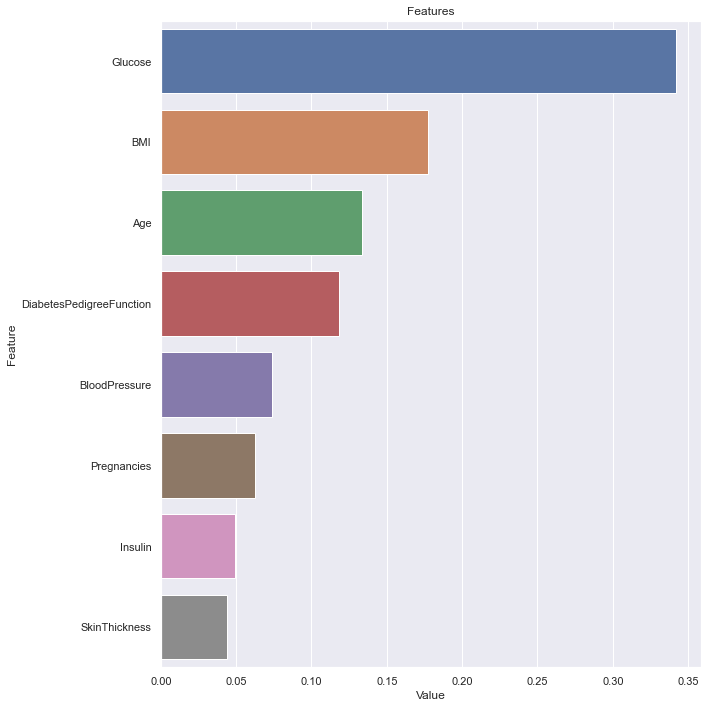

In [104]:
# Feature Importance bakalım.

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

plot_importance(rf_final, X, num=10)

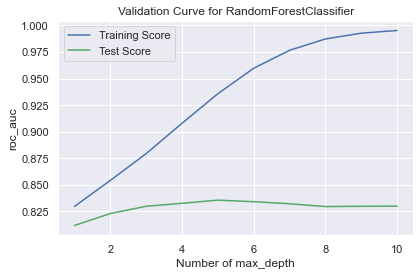

In [106]:
# Validation Curve

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(model, X=X, y=y, 
                                               param_name = param_name, param_range=param_range,
                                              scoring=scoring, cv=cv)
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)
    
    plt.plot(param_range, mean_train_score, label="Training Score", color="b")
    plt.plot(param_range, mean_test_score, label="Test Score", color="g")
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()
    
val_curve_params(rf_final, X, y, "max_depth", range(1,11), scoring="roc_auc")

## Gradient Boosting Machines (GBM)

* AdaBoost (Adaptive Boosting) temellerine dayanır. Bu yönteme göre zayıf sınıflandırıcıların bir araya gelerek güçlü bir sıınflandırıcı oluşturması fikrine dayanır. 
* GBM, Hatalar/artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur. 
>>>> 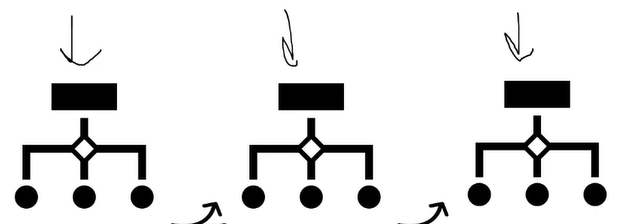  

* Ağaçlar birbirine bağlıdır. Boosting yöntemlerinin Bagging'ten en büyük farkı budur diyebiliriz.

* Boosting + Gradient Descent = GBM 
* Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur. 
* Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) oluşturulur. 
* Tek bir tahminsel model formunda olan modeller serisi additive şeklinde kurulur. 

### Additive Modeling?

>>>> 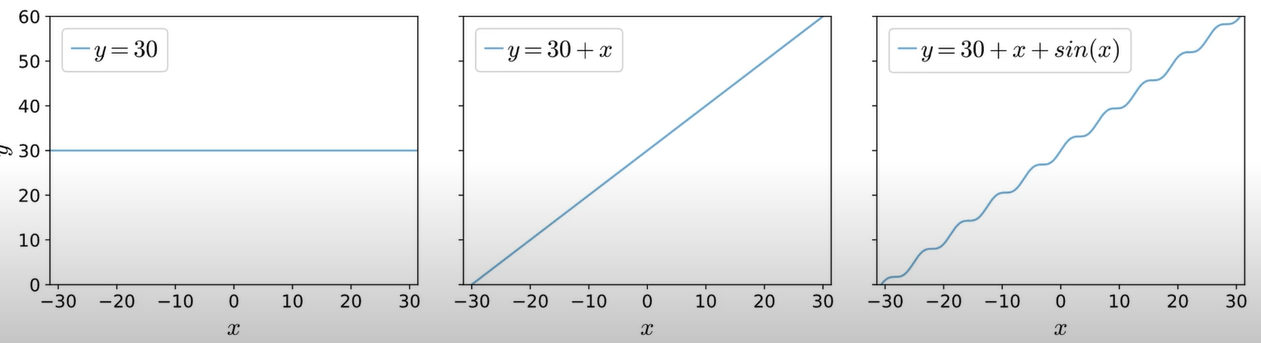

### Uygulama

In [107]:
gbm_model = GradientBoostingClassifier(random_state=17)
gbm_model.get_params() # Default değerler

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [108]:
# Base modelimizin sonuçlarına bakalım.
cv_results = cross_validate(gbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

test accuracy: 0.7591715474068416
test f1: 0.634235802826363
test roc_auc: 0.8254867225716283


In [109]:
# Hyperparameter Optimization

gbm_params = {"learning_rate": [0.01, 0.1],
             "max_depth": [3, 8, 10],
             "n_estimators": [100, 500, 1000],
             "subsample": [1, 0.5, 0.7]}

gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
gbm_best_grid.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

In [110]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17).fit(X, y)

# Final Model
cv_results = cross_validate(gbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

test accuracy: 0.7800186741363212
test f1: 0.668605747317776
test roc_auc: 0.8257784765897973


## XGBoost

* XGBoost, GBM'in hız ve tahmin perfomansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir versiyonudur. 

In [111]:
xgboost_model = XGBClassifier(random_state=17)

# Base modelimizin sonuçlarına bakalım.
cv_results = cross_validate(xgboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

[02:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [113]:
# Hyperparameter Optimization

xgboost_params = {"learning_rate": [0.01, 0.1, 0.001],
             "max_depth": [5, 8, 12, 15, 20],
             "n_estimators": [100, 500, 1000],
             "colsample_bytree": [1, 0.5, 0.7]}

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
xgboost_best_grid.best_params_

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[02:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.5,
 'learning_rate': 0.001,
 'max_depth': 5,
 'n_estimators': 500}

In [114]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

# Final Model
cv_results = cross_validate(xgboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

[02:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:24:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## LightGBM

* LightGBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür. 
* Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi ile daha hızlıdır. 
* XGBoost geniş kapsamlı bir ilk arama yaparken, LightGBM derinlemesine ilk arama yapar.

In [115]:
lgbm_model = LGBMClassifier(random_state=17)
lgbm_model.get_params() # default parametreler

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [116]:
# Base modelimizin sonuçlarına bakalım.
cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

test accuracy: 0.7474492827434004
test f1: 0.624110522144179
test roc_auc: 0.7990293501048218


In [119]:
# Hyperparameter Optimization

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
             "n_estimators": [100, 300, 500, 1000],
             "colsample_bytree": [1, 0.5, 0.7]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
lgbm_best_grid.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 300}

In [120]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

# Final Model
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

test accuracy: 0.7643578643578645
test f1: 0.6372062920577772
test roc_auc: 0.8147491264849755


---   

**NOT**
> * LightGBM için n_estimators çok önemlidir. Normalde bu değeri 10binlere kadar çıkartmak gerekir.  

---   



## CatBoost

* Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM türevi.

In [121]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

# Base modelimizin sonuçlarına bakalım.
cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

test accuracy: 0.7735251676428148
test f1: 0.6502723851348231
test roc_auc: 0.8378923829489867


In [122]:
# Hyperparameter Optimization

catboost_params = {"learning_rate": [0.01, 0.1],
             "iterations": [200, 500],
             "depth": [3, 6]}

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
catboost_best_grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [123]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

# Final Model
cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

test accuracy: 0.7721755368814192
test f1: 0.6322580676028952
test roc_auc: 0.842001397624039


## Feature Importance

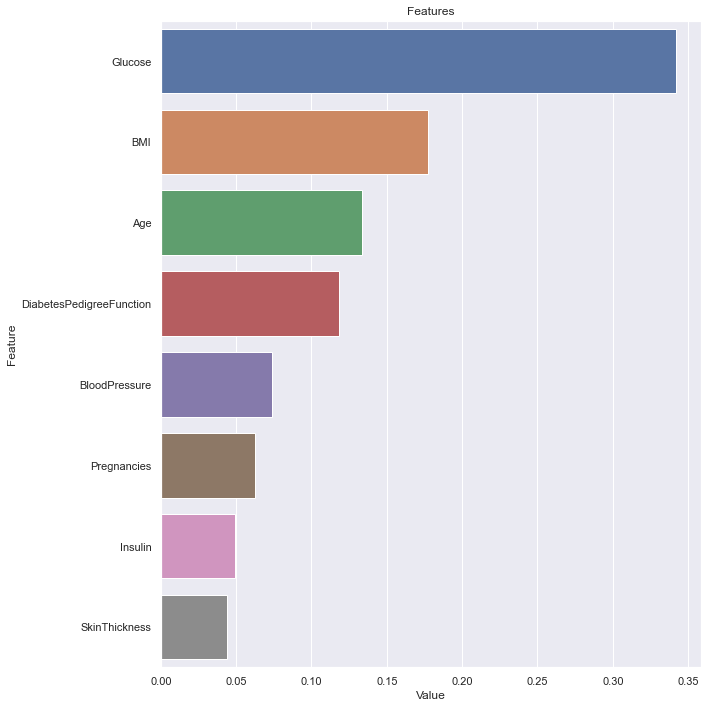

In [124]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

plot_importance(rf_final, X)

## RandomSearchCV

* Verilecek bir hiperparametre seti içerisinden rastgele seçimler yapar ve bu seçimleri arar.

In [131]:
rf_model = RandomForestClassifier(random_state=17)

rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                   "max_features": [3, 5, 7, "auto", "sqrt"],
                   "min_samples_split": np.random.randint(2, 50, 20),
                   "n_estimators" :[int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

rf_random = RandomizedSearchCV(estimator=rf_model,
                              param_distributions=rf_random_params,
                              n_iter=100,
                              cv=3,
                              verbose=True,
                              random_state=42,
                              n_jobs=-1)
rf_random.fit(X, y)
rf_random.best_params_ # Default değerler

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 22,
 'max_features': 'sqrt',
 'max_depth': 28}

In [132]:
rf_final = rf_model.set_params(**rf_random.best_params_, random_state=17).fit(X, y)

# Final Model
cv_results = cross_validate(rf_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test accuracy:", cv_results["test_accuracy"].mean())
print("test f1:", cv_results["test_f1"].mean())
print("test roc_auc:", cv_results["test_roc_auc"].mean())

test accuracy: 0.7696120872591461
test f1: 0.6349765689355348
test roc_auc: 0.8361747030048916


## Öğrenme Eğrileriyle Model Karmaşıklığını İnceleme

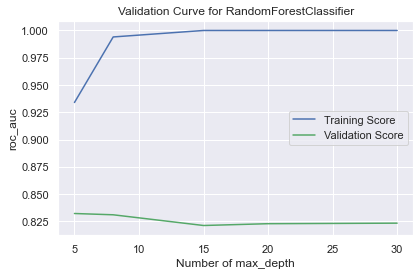

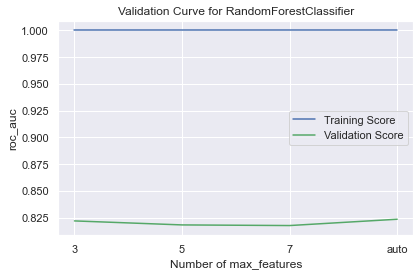

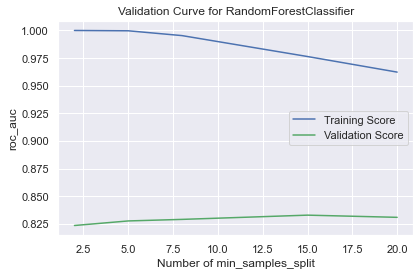

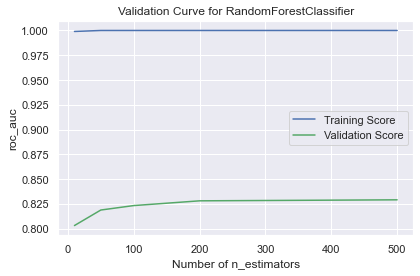

[5, 8, 15, 20, 30, None]

In [133]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)


rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]

rf_model = RandomForestClassifier(random_state=17)

for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1])
